In [96]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import diags

QUESTION 2a $\newline$
Sammy Suliman, last modified: 11/11/2022 $\newline$
The purpose of this code is to implement the coefficients of an interpolating polynomial through 
Newton's divided difference, then construct the polynomial from the coefficents. The input parameters of newtons_difference() are a list of the interpolation points, and the function to be approximated. The input parameters of interpolation() are the input to the polynomial x, a list of interpolation points, and the coefficients from the newtons_difference() function.

In [97]:
def newtons_difference(x_list, f):
    c = []
    poly_coeff = []
    i = 1
    for x_j in x_list:
        c.append(f(x_j))
    for j in reversed(range(len(x_list))):
        if j < (len(x_list)-1):
            poly_coeff.append(c[0])
            c = c[1:]
            i += 1
        for k in reversed(range(j)):
            c[k+1] = (c[k+1] - c[k]) / (x_list[k+i] - x_list[k])
    poly_coeff.append(c[0])
    return poly_coeff

In [98]:
def interpolation(x, x_list, poly_coeff):
    p = poly_coeff[-1]
    for k in reversed(range(len(x_list) - 1)):
        p = poly_coeff[k] + (x - x_list[k])*p
    return p

QUESTION 2b $\newline$
Sammy Suliman, last modified 11/11/2022 $\newline$
The purpose of this code is to use the above interpolation to compute the interpolation of the function
f(x) = e^(-x^2) at 10 interpolation points on the interval [-1, 1], then plotting the interpolating polynomial,
and its corresponding error rate.

In [99]:
def f(x):
    return math.exp(-x**2)

In [100]:
coeff = newtons_difference([0, 1, 2], f)

In [101]:
print(coeff)

[1.0, -0.6321205588285577, 0.14127837827292475]


In [102]:
interpolation(3, [0, 1, 2], coeff)

-0.04869140684812456

In [103]:
def x(n):
    x = []
    for j in range(n+1):
        x.append(-1 + j*(2/n))
    return x

In [104]:
x_list = x(10)
x_list2 = x(100)
coeff2 = newtons_difference(x_list, f)

In [105]:
poly = []
for x_j in x_list2:
    poly.append(interpolation(x_j, x_list, coeff2))

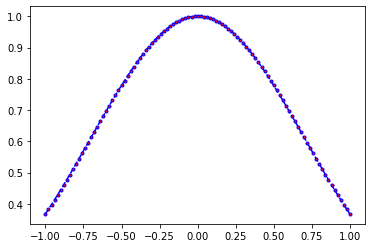

In [106]:
plt.plot(x_list2, poly, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=3)

In [107]:
error_rate = []
for x_j in x_list2:
    error_rate.append(math.fabs(f(x_j) - interpolation(x_j, x_list, coeff2)))

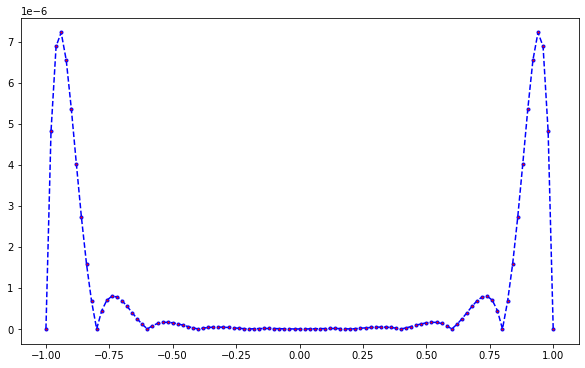

In [108]:
plt.figure(figsize=(10,6))
plt.plot(x_list2, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)

QUESTION 3 $\newline$
Sammy Suliman, last modified 11/11/2022 $\newline$
The purpose of this code is to use polynomial interpolation to approximate the inverse of the function $g(x) = x - e^{-x}$,
and then plug zero into this approximation to approximate the zero of the original function g. 

In [109]:
def g(x):
    return x - math.exp(-x)

In [110]:
# modification of original newtons_difference() function that accepts list of function points to approximate,
# instead of the function itself
def newtons_difference2(x_list, f_nodes):
    poly_coeff = []
    i = 1
    for j in reversed(range(len(x_list))):
        if j < (len(x_list)-1):
            poly_coeff.append(f_nodes[0])
            f_nodes = f_nodes[1:]
            i += 1
        for k in reversed(range(j)):
            f_nodes[k+1] = (f_nodes[k+1] - f_nodes[k]) / (x_list[k+i] - x_list[k])
    poly_coeff.append(f_nodes[0])
    return poly_coeff

In [111]:
x_list3 = [-0.106530659712633, 0.051188363905973]

In [112]:
g_inverse_nodes = [0.5, 0.6]

In [113]:
coeff3 = newtons_difference2(x_list3, g_inverse_nodes)

In [114]:
print(coeff3)

[0.5, 0.6340389238131389]


In [115]:
print(interpolation(0, x_list3, coeff3))

0.5675445848373015


QUESTION 4 $\newline$
Sammy Suliman, last modified 11/11/2022 $\newline$
The purpose of this code is to obtain the Hermite interpolation for a function with values at $f(0) = 0$, $f(1) = 2$, $f'(0) = 0$, $f'(1) = 3$.

In [116]:
x_list4 = [0, 0, 1, 1]

In [117]:
h_nodes = [0, 0, 2, 3]

In [118]:
def hermite_coefficients(x_list, f_nodes):
    poly_coeff = []
    i = 1
    for j in reversed(range(len(x_list))):
        if j < (len(x_list)-1):
            poly_coeff.append(f_nodes[0])
            f_nodes = f_nodes[1:]
            i += 1
        for k in reversed(range(j)):
            try:
                f_nodes[k+1] = (f_nodes[k+1] - f_nodes[k]) / (x_list[k+i] - x_list[k])
            except ZeroDivisionError:
                pass
    poly_coeff.append(f_nodes[0])
    return poly_coeff

In [119]:
coeff4 = hermite_coefficients(x_list4, h_nodes)

In [120]:
coeff4

[0, 0, 2.0, -1.0]

In [121]:
def hermite_interpolation(x, x_list, poly_coeff):
    p = poly_coeff[0]
    for k in (range(len(x_list) - 1)):
        if k > 0:
            p = p + poly_coeff[k+1]*(q*(x - x_list[k]))
            q = q*(x - x_list[k])
        else: 
            q = x - x_list[k]
            p = p + poly_coeff[k+1]*q
    return p

QUESTION 5 $\newline$
Sammy Suliman, last modified 11/11/2022 $\newline$
The purpose of this code is to compute a natural spline interpolation of a set of nodes $(x_0, f(x_0)), ..., (x_n, f(x_n))$.
This is done by creating a set of $n-1$ linear equations in the form $h_{i-1}*z_{i-1} + 2(h_{i-1} + h_i)z_i + h_i*z_{i+1} = \frac{-6}{h_{i-1}}*(f(x_i) - f(x_{i-1})) + \frac{6}{h_i}*(f(x_{i+1}) - f(x_i))$ and solving for $z_i$ values using a matrix, where $z_i$ is the second derivative of the spline interpolation $S_j(x_i)$. An example is given, plotting the natural spline interpolation of the function $f(x) = e^x$ at the points $x_0 = 0, x_1 = 1, x_2 = 2, x_3 = 3, x_4 = 4, x_5 = 5$.

In the below code, h_j() computes the distances between interpolation points, with its input being the list of interpolation points.

In [122]:
def h_j(x_list):
    h_j = []
    for i, x_j in enumerate(x_list[:len(x_list)-1]):
        h_j.append(x_list[i+1] - x_j)
    return h_j

y_creator() computes the right-hand side of the above equation, with its inputs being the list of interpolation points, the list of h_j differences from the h_j function, and the function to be approximated, f.

In [123]:
def y_creator(x_list, h_j_list, f):
    y = []
    for i, x_j in enumerate(x_list[:len(x_list)-2]):
        y.append(-6/h_j_list[i]*(f(x_list[i+1]) - f(x_j)) +
                 6/h_j_list[i+1]*(f(x_list[i+2]) - f(x_list[i+1])))
    return y    

natural_spline() computes the $z_i$ values, with its input parameters being the h_j list, and the list of y-values from y_creator().

In [124]:
def natural_spline(h_j_list, y):
    n = len(h_j_list)
    k = []
    for (i, h_j) in enumerate(h_j_list):
        if i == 0:
            k_1 = [2*(h_j_list[i] + h_j_list[i+1]), h_j_list[i+1]]
            zero_array = [* np.zeros(n-3)]
            k.append(k_1 + zero_array)
        elif i == n-2:
            k_1 = [h_j, 2*(h_j_list[i-1] + h_j)]
            zero_array = [* np.zeros(n-3)]
            k.append(zero_array + k_1)
        elif i < n-2:
            k_1 = [h_j, 2*(h_j + h_j_list[i+1]), h_j_list[i+1]]
            zero_array1 = [* np.zeros(i-1)]
            zero_array2 = [* np.zeros(n-(3+i))]
            k.append(zero_array1 + k_1 + zero_array2)
    k_mat = np.array(k)
    y_vec = np.array(y)
    return np.linalg.solve(k_mat, y_vec)

In [125]:
h_list = h_j([0,1,2,3,4,5])

In [126]:
def f(x):
    return math.exp(x)

In [127]:
f_list1 = []
for x_j in [0,1,2,3,4,5]:
    f_list1.append(f(x_j))

In [128]:
f_list1

[1.0,
 2.718281828459045,
 7.38905609893065,
 20.085536923187668,
 54.598150033144236,
 148.4131591025766]

In [129]:
print(h_list)

[1, 1, 1, 1, 1]


In [130]:
y = y_creator([0,1,2,3,4,5], h_list, f)

In [131]:
np.array(y)

array([ 17.71495465,  48.15423932, 130.89679371, 355.81437576])

In [132]:
z_list1 = list(natural_spline(h_list, y))

In [133]:
z_list1.insert(0, 0)
z_list1.insert(6, 0)

In [134]:
z_list1

[0,
 2.0932855013180274,
 9.341812646803254,
 8.693703234181429,
 86.78016813066834,
 0]

coefficient_creator() computes the coefficients of $S_j(x_i)$, with input parameters the list of z-values from natural_spline(), a list of function values f_list, and h_list.

In [135]:
def coefficient_creator(z_list, f_list, h_list):
    a = []
    b = []
    c = []
    d = []
    poly = []
    for i in range(0, len(z_list)-1):
        a.append((z_list[i+1] - z_list[i])/(6*h_list[i]))
        b.append(z_list[i]/2)
        c.append((1/h_list[i])*(f_list[i+1]-f_list[i]) - (1/6*h_list[i])*(z_list[i+1] + 2*z_list[i]))
        d.append(f_list[i])
    for k in range(0, len(a)):
        poly.append((a[k], b[k], c[k], d[k]))
    return poly

poly() computes $S_j(x_i)$, with input parameters the list of x-values to evaluate over, the list of interpolation points, and the coefficients of the polynomial from coefficient_creator().

In [136]:
def poly(x_interval, x_j, coeff):
    poly1 = []
    for x in x_interval:
        poly1.append((coeff[0]*(x - x_j)**3 + coeff[1]*(x - x_j)**2 + coeff[2]*(x - x_j) + coeff[3]))
    return poly1

In [137]:
poly_coefficients1 = coefficient_creator(z_list1, f_list1, h_list)

In [138]:
poly_coefficients1

[(0.3488809168863379, 0.0, 1.3694009115727073, 1.0),
 (1.2080878575808711,
  1.0466427506590137,
  2.416043662231721,
  2.718281828459045),
 (-0.10801823543697076, 4.670906323401627, 8.13359273629236, 7.38905609893065),
 (13.014410816081153,
  4.3468516170907145,
  17.151350676784702,
  20.085536923187668),
 (-14.46336135511139,
  43.39008406533417,
  64.88828635920959,
  54.598150033144236)]

cubic_interpolation_plot() plots the interpolating polynomial with input parameters the list of interpolation points, and the list of polynomial coefficients.

In [139]:
plt.figure(figsize=(10,6))
def cubic_interpolation_plot(t_list, coefficients):
    for (i, coeff) in enumerate(coefficients):
        plt.plot(np.arange(t_list[i], t_list[i+1], (t_list[i+1] - t_list[i])/100),
        poly(np.arange(t_list[i], t_list[i+1], (t_list[i+1] - t_list[i])/100), t_list[i], coeff),
        color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=3)

<Figure size 720x432 with 0 Axes>

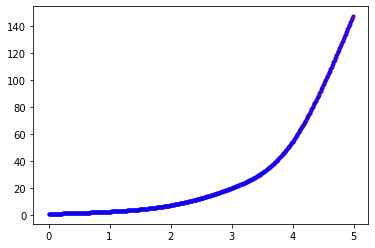

In [140]:
cubic_interpolation_plot([0,1,2,3,4,5], poly_coefficients1)

QUESTION 6 $\newline$
Sammy Suliman, last modified 11/11/2022 $\newline$
The purpose of this code is to use natural spline interpolation to construct a smooth parametric representation of a curve passing through the points $(x_0, y_0), ..., (x_8, y_8)$, by constructing 2 spline interpolations going through $(t_0, x_0), ..., (t_8, x_8), (t_0, y_0), ..., (t_8, y_8)$, and tabulating their coefficients. We then plot the 2 polynomials for points on the x-axis, and points of the y-axis against one another to construct the parametric representation of the curve passing through the points $(x_j, y_j)$.

In [141]:
t_list = [0, 0.618, 0.935, 1.255, 1.636, 1.905, 2.317, 2.827, 3.330]

In [142]:
x_list = [1.5, 0.9, 0.6, 0.35, 0.2, 0.1, 0.5, 1, 1.5]

In [143]:
y_list = [0.75, 0.9, 1, 0.8, 0.45, 0.2, 0.1, 0.2, 0.25]

In [144]:
h_list2 = h_j(t_list)

y_creator2() adjust previous function y_creator() to take in a list of function values instead of the function itself.

In [145]:
def y_creator2(x_list, h_j_list, f_list):
    y = []
    for i, x_j in enumerate(x_list[:len(x_list)-2]):
        y.append(-6/h_j_list[i]*(f_list[i+1] - f_list[i]) +
                 6/h_j_list[i+1]*(f_list[i+2] - f_list[i+1]))
    return y

In [146]:
y2 = y_creator2(t_list, h_list2, x_list)

In [147]:
y3 = y_creator2(t_list, h_list2, y_list)

In [148]:
spline1 = natural_spline(h_list2, y2)
spline1 = list(spline1)

In [149]:
spline2 = natural_spline(h_list2, y3)
spline2 = list(spline2)

In [150]:
spline1.insert(0, 0)
spline1.insert(8, 0)

In [151]:
spline2.insert(0, 0)
spline2.insert(8, 0)

In [152]:
spline2

[0,
 1.0268919076917777,
 -4.68092765772873,
 -0.01489805714737687,
 -0.6378663963995579,
 2.864332045635557,
 0.9472410517059686,
 -0.5765412437268853,
 0]

In [153]:
def coefficient_creator(z_list, f_list, h_list):
    a = []
    b = []
    c = []
    d = []
    poly = []
    for i in range(0, len(z_list)-1):
        a.append((z_list[i+1] - z_list[i])/(6*h_list[i]))
        b.append(z_list[i]/2)
        c.append((1/h_list[i])*(f_list[i+1]-f_list[i]) - (1/6*h_list[i])*(z_list[i+1] + 2*z_list[i]))
        d.append(f_list[i])
    for k in range(0, len(a)):
        poly.append((a[k], b[k], c[k], d[k]))
    return poly

In [154]:
poly_coefficients = coefficient_creator(spline1, x_list, h_list2)

In [155]:
poly_coefficients

[(0.010540470315907494, 0.0, -0.9748994449926996, 1.5),
 (0.10205500459894179, 0.019542031965692496, -0.9628224692379017, 0.9),
 (0.9873610905434708, 0.11659634133928616, -0.9196666049002233, 0.6),
 (-1.7741236730312973, 1.0644629882610177, -0.5417276194281263, 0.35),
 (5.397994078491295, -0.9633603700137551, -0.5032075218759193, 0.2),
 (-3.4009199261091627, 3.3928208513287217, 0.15031734759780724, 0.1),
 (0.6909378470858061, -0.8107161773422055, 1.214144473280252, 0.5),
 (-0.1632993563280831, 0.24641872869907744, 0.9114033715978462, 1)]

In [156]:
X_coeff_table = pd.DataFrame(poly_coefficients)

In [157]:
X_coeff_table.columns = ['A_j', 'B_j', 'C_j', 'D_j']

In [158]:
X_coeff_table

,A_j,B_j,C_j,D_j
0,0.010540,0.000000,-0.974899,1.50
1,0.102055,0.019542,-0.962822,0.90
2,0.987361,0.116596,-0.919667,0.60
3,-1.774124,1.064463,-0.541728,0.35
4,5.397994,-0.963360,-0.503208,0.20
5,-3.400920,3.392821,0.150317,0.10
6,0.690938,-0.810716,1.214144,0.50
7,-0.163299,0.246419,0.911403,1.00


In [159]:
def poly(x_interval, x_j, coeff):
    poly1 = []
    for x in x_interval:
        poly1.append((coeff[0]*(x - x_j)**3 + coeff[1]*(x - x_j)**2 + coeff[2]*(x - x_j) + coeff[3]))
    return poly1

cubic_interpolation_plot() plots the complete polynomial interpolation $S(x)$, by iterating through each
interpolation $S_j(x)$ for each subinterval. The function takes as input parameters a list of interpolating points,
and a nested list of polynomial coefficients for each $S_j(x)$.

In [160]:
plt.figure(figsize=(10,6))
def cubic_interpolation_plot(t_list, coefficients):
    for (i, coeff) in enumerate(coefficients):
        plt.plot(np.arange(t_list[i], t_list[i+1], (t_list[i+1] - t_list[i])/100),
        poly(np.arange(t_list[i], t_list[i+1], (t_list[i+1] - t_list[i])/100), t_list[i], coeff),
        color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=3)

<Figure size 720x432 with 0 Axes>

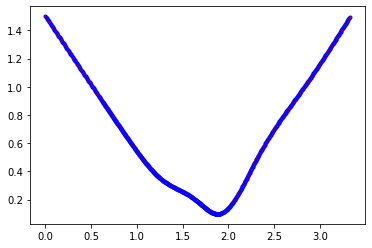

In [161]:
cubic_interpolation_plot(t_list, poly_coefficients)

In [162]:
poly_coefficients2 = coefficient_creator(spline2, y_list, h_list2)

In [163]:
poly_coefficients2

[(0.2769395651811698, 0.0, 0.1369485801096887, 0.75),
 (-3.000956659001318, 0.5134459538458889, 0.454258179586448, 0.9),
 (2.430223750302789, -2.340463828864365, -0.12490648679440919, 1),
 (-0.2725145840998167, -0.007449028573688435, -0.8762386011745859, 0.8),
 (2.1698875105545934, -0.31893319819977894, -1.0005902295752769, 0.45),
 (-0.7755222467352701, 1.4321660228177786, -0.7011305997530348, 0.2),
 (-0.49796807040289365, 0.4736205258529843, 0.08405345829931973, 0.1),
 (0.19103420931971013, -0.28827062186344266, 0.19607032706036812, 0.2)]

In [164]:
Y_coeff_table = pd.DataFrame(poly_coefficients2)

In [165]:
Y_coeff_table.columns = ['A_j', 'B_j', 'C_j', 'D_j']

In [166]:
Y_coeff_table

,A_j,B_j,C_j,D_j
0,0.276940,0.000000,0.136949,0.75
1,-3.000957,0.513446,0.454258,0.90
2,2.430224,-2.340464,-0.124906,1.00
3,-0.272515,-0.007449,-0.876239,0.80
4,2.169888,-0.318933,-1.000590,0.45
5,-0.775522,1.432166,-0.701131,0.20
6,-0.497968,0.473621,0.084053,0.10
7,0.191034,-0.288271,0.196070,0.20


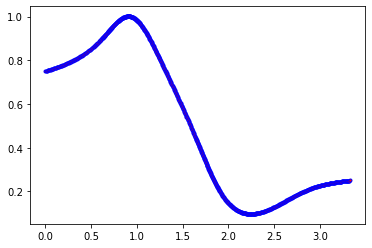

In [167]:
cubic_interpolation_plot(t_list, poly_coefficients2)

In [168]:
def cubic_interpolation(t_list, coefficients):
    xp = []
    for (i, coeff) in enumerate(coefficients):
        xp.append(poly(np.arange(t_list[i], t_list[i+1], (t_list[i+1] - t_list[i])/100), t_list[i], coeff))
    return xp

In [169]:
xp = cubic_interpolation(t_list, poly_coefficients)
yp = cubic_interpolation(t_list, poly_coefficients2)

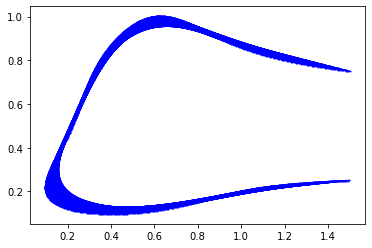

In [170]:
plt.plot(xp, yp, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=1)
plt.show()